In [1277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [1278]:
df=pd.read_csv('crime_dataset_csv file.csv')
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [1279]:
date_cols = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y %H:%M', errors='coerce')
for col in date_cols:
    df[col] = df[col].dt.strftime('%d-%m-%Y ')
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020,01-01-2020,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020,01-01-2020,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020,01-01-2020,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020,01-01-2020,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020
4,5,01-01-2020,01-01-2020,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024,NaN,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024,NaN,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024
40157,40158,02-08-2024,NaN,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024,NaN,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [1280]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [1281]:
print("Shape:", df.shape, "\nSize:", df.size)

Shape: (40160, 14) 
Size: 562240


In [1282]:
df = df.drop(columns=['Report Number', 'Crime Code','Date of Occurrence',])
df.columns

Index(['Date Reported', 'Time of Occurrence', 'City', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [1283]:
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%d-%m-%Y %H:%M')
df['Date of Occurrence'] = df['Time of Occurrence'].dt.date
df['Time Only'] = df['Time of Occurrence'].dt.time
df.drop(columns=['Time of Occurrence'], inplace=True)
df

,Date Reported,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Date of Occurrence,Time Only
0,02-01-2020,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020-01-01,01:11:00
1,01-01-2020,Chennai,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020-01-01,06:26:00
2,02-01-2020,Ludhiana,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020-01-01,14:30:00
3,01-01-2020,Pune,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020,2020-01-01,14:46:00
4,01-01-2020,Pune,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020,2020-01-01,16:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...
40155,01-08-2024,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN,2024-07-31,05:05:00
40156,31-07-2024,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024,2024-07-31,04:14:00
40157,02-08-2024,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN,2024-07-31,21:33:00
40158,01-08-2024,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN,2024-07-31,11:05:00


In [1284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date Reported       40160 non-null  object
 1   City                40160 non-null  object
 2   Crime Description   40160 non-null  object
 3   Victim Age          40160 non-null  int64 
 4   Victim Gender       40160 non-null  object
 5   Weapon Used         34370 non-null  object
 6   Crime Domain        40160 non-null  object
 7   Police Deployed     40160 non-null  int64 
 8   Case Closed         40160 non-null  object
 9   Date Case Closed    20062 non-null  object
 10  Date of Occurrence  40160 non-null  object
 11  Time Only           40160 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.7+ MB


In [1285]:
df.describe()

,Victim Age,Police Deployed
count,40160.00000,40160.000000
mean,44.49126,10.006250
std,20.22555,5.467951
min,10.00000,1.000000
25%,27.00000,5.000000
50%,44.00000,10.000000
75%,62.00000,15.000000
max,79.00000,19.000000


In [1286]:
df.isnull().sum()

Date Reported             0
City                      0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
Date of Occurrence        0
Time Only                 0
dtype: int64

In [1287]:
weapon_mode = df['Weapon Used'].mode()[0]
df.fillna({
    'Weapon Used': weapon_mode,
    'Date Case Closed': pd.Timestamp('2025-01-01')
}, inplace=True)

df.isnull().sum()

Date Reported         0
City                  0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
Date of Occurrence    0
Time Only             0
dtype: int64

In [1288]:
df.nunique()

Date Reported         1676
City                    29
Crime Description       21
Victim Age              70
Victim Gender            3
Weapon Used              6
Crime Domain             4
Police Deployed         19
Case Closed              2
Date Case Closed      2045
Date of Occurrence    1674
Time Only             1440
dtype: int64

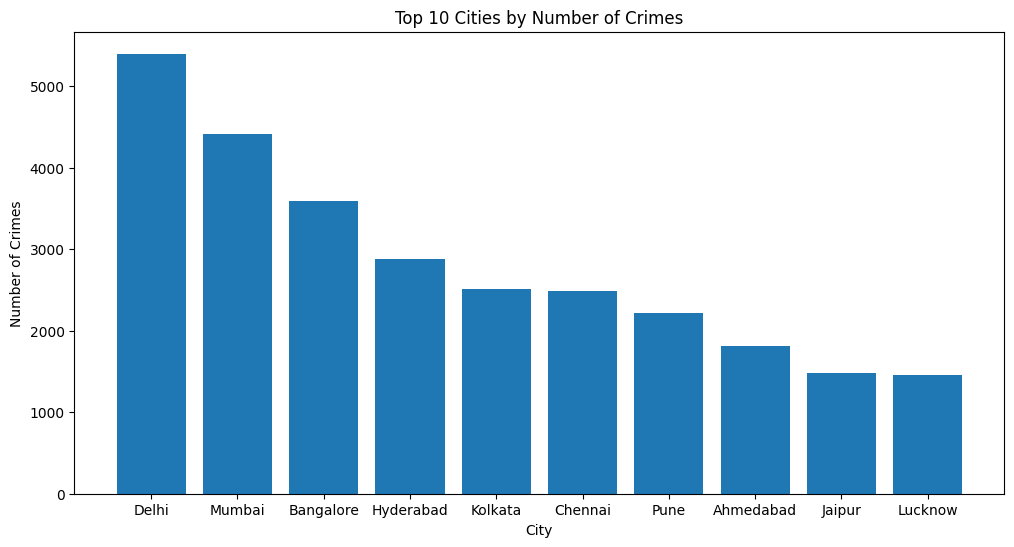

In [1289]:
#TOP 10 CITIES BY NUMBER OF CRIMES
a=df['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(a.index,a.values)
plt.xticks(rotation=360)
plt.title('Top 10 Cities by Number of Crimes')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.show()

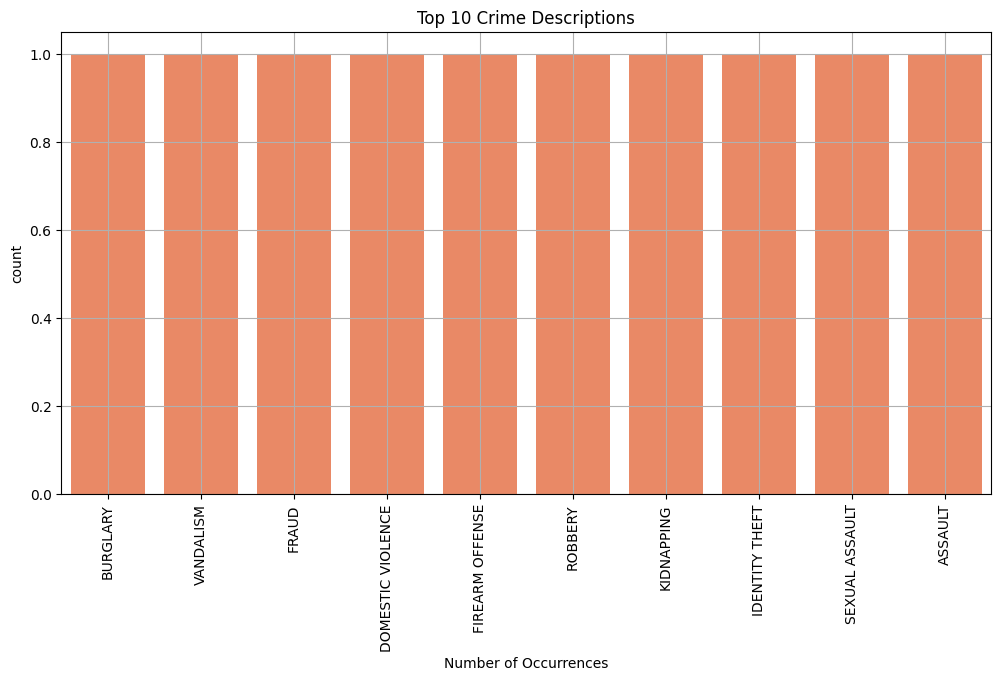

In [1290]:
# top crime distribution
plt.figure(figsize=(12,6))
top_crimes = df['Crime Description'].value_counts().head(10)
sns.countplot(top_crimes, color='coral')
plt.xlabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.title('Top 10 Crime Descriptions')
plt.grid(True)
plt.show()

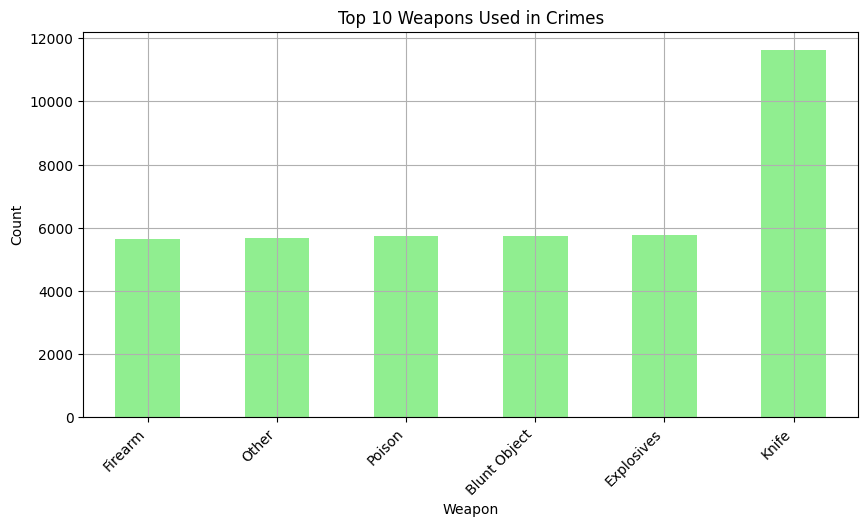

In [1291]:
# top 10 weapons used in crimes (smallest to largest)
top_weapons = df['Weapon Used'].value_counts().head(10)
top_weapons.sort_values().plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


In [1292]:
df.loc[:, 'Victim Gender'] = df['Victim Gender'].map({'M': 0, 'F': 1}).fillna(0).astype(int)
df

,Date Reported,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Date of Occurrence,Time Only
0,02-01-2020,Ahmedabad,IDENTITY THEFT,16,0,Blunt Object,Violent Crime,13,No,2025-01-01 00:00:00,2020-01-01,01:11:00
1,01-01-2020,Chennai,HOMICIDE,37,0,Poison,Other Crime,9,No,2025-01-01 00:00:00,2020-01-01,06:26:00
2,02-01-2020,Ludhiana,KIDNAPPING,48,1,Blunt Object,Other Crime,15,No,2025-01-01 00:00:00,2020-01-01,14:30:00
3,01-01-2020,Pune,BURGLARY,49,1,Firearm,Other Crime,1,Yes,29-04-2020,2020-01-01,14:46:00
4,01-01-2020,Pune,VANDALISM,30,1,Other,Other Crime,18,Yes,08-01-2020,2020-01-01,16:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...
40155,01-08-2024,Kolkata,COUNTERFEITING,78,1,Firearm,Other Crime,12,No,2025-01-01 00:00:00,2024-07-31,05:05:00
40156,31-07-2024,Mumbai,ILLEGAL POSSESSION,75,1,Knife,Other Crime,2,Yes,29-09-2024,2024-07-31,04:14:00
40157,02-08-2024,Kanpur,VEHICLE - STOLEN,68,0,Other,Violent Crime,6,No,2025-01-01 00:00:00,2024-07-31,21:33:00
40158,01-08-2024,Patna,SEXUAL ASSAULT,11,0,Blunt Object,Violent Crime,1,No,2025-01-01 00:00:00,2024-07-31,11:05:00


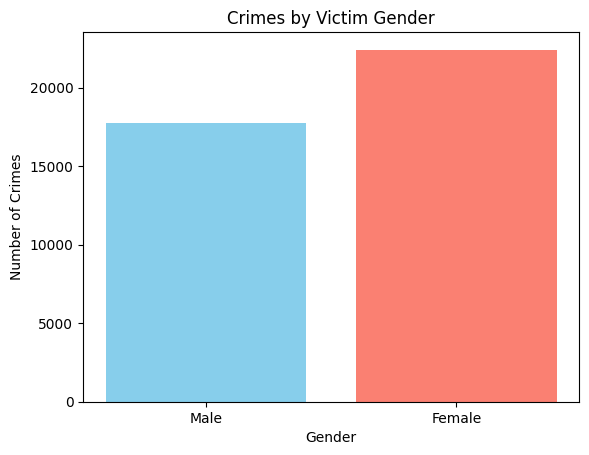

In [1293]:
#identify crimes by victim gender

gender_counts = [df['Victim Gender'].value_counts()[0], df['Victim Gender'].value_counts()[1]]
labels = ['Male', 'Female']

plt.bar(labels, gender_counts, color=['skyblue', 'salmon'])
plt.title('Crimes by Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.show()



In [1294]:
#Female-Targeted Crimes
crime_gender_counts = df.groupby(['Crime Description', 'Victim Gender']).size().unstack(fill_value=0)
print(crime_gender_counts.columns)

crimes_sorted_by_female = crime_gender_counts.sort_values(by=1, ascending=False)
print(crimes_sorted_by_female[[1, 0]].head(10))


Index([0, 1], dtype='int64', name='Victim Gender')
Victim Gender           1    0
Crime Description             
VANDALISM            1144  831
FRAUD                1102  863
BURGLARY             1094  886
ROBBERY              1084  844
ASSAULT              1082  833
IDENTITY THEFT       1078  840
DOMESTIC VIOLENCE    1078  854
PUBLIC INTOXICATION  1074  838
TRAFFIC VIOLATION    1074  841
FIREARM OFFENSE      1071  860


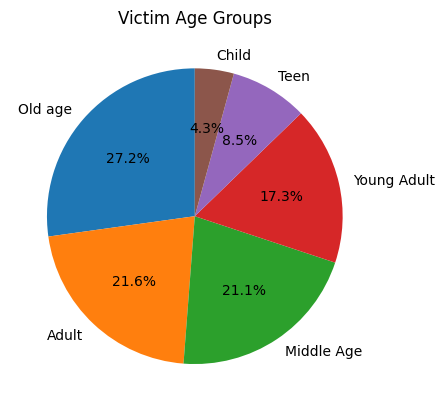

In [1295]:
df['Age Group'] = pd.cut(df['Victim Age'], bins=[0,12,18,30,45,60,100],
                         labels=['Child','Teen','Young Adult','Adult','Middle Age','Old age'])
df['Age Group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Victim Age Groups')
plt.ylabel('')
plt.show()


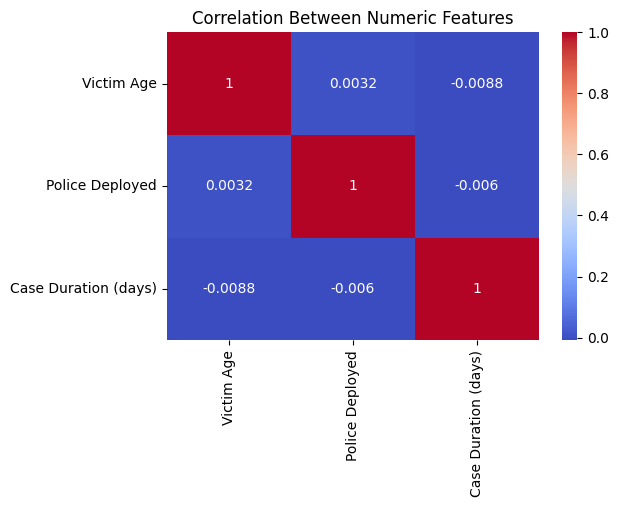

In [1298]:
#Correlation between victim age, police deployed,case duration

df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y ')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], format='%d-%m-%Y %H:%M', errors='coerce')

df['Case Duration (days)'] = (df['Date Case Closed'] - df['Date Reported']).dt.days
#df = df.dropna(subset=['Case Duration (days)'])
numeric_cols = ['Victim Age', 'Police Deployed', 'Case Duration (days)']

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

In [1299]:
df['Case Closed'].unique()

array(['No', 'Yes'], dtype=object)

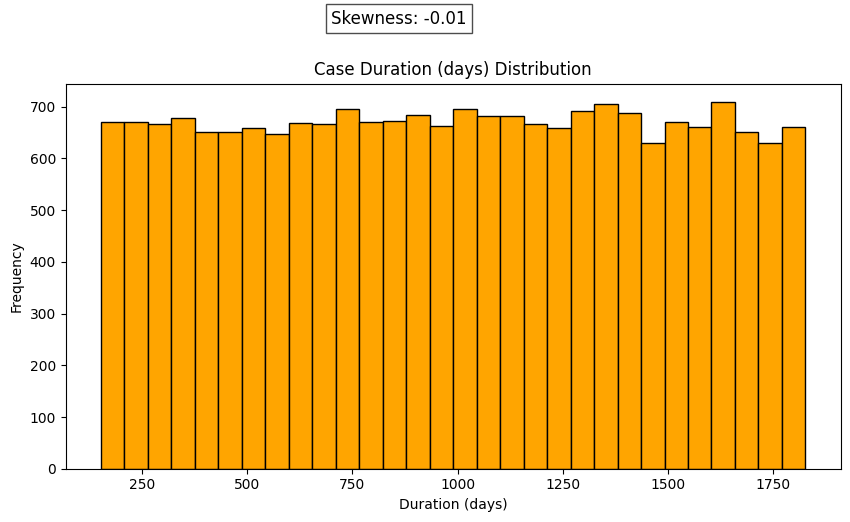

In [1300]:

case_duration = (df['Date Case Closed'] - df['Date Reported']).dt.days.dropna()

#calculate skewness
skewness_value = skew(case_duration)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(case_duration, bins=30, color='orange', edgecolor='black')
plt.title('Case Duration (days) Distribution')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.text(700,860,f'Skewness: {skewness_value:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
plt.show()


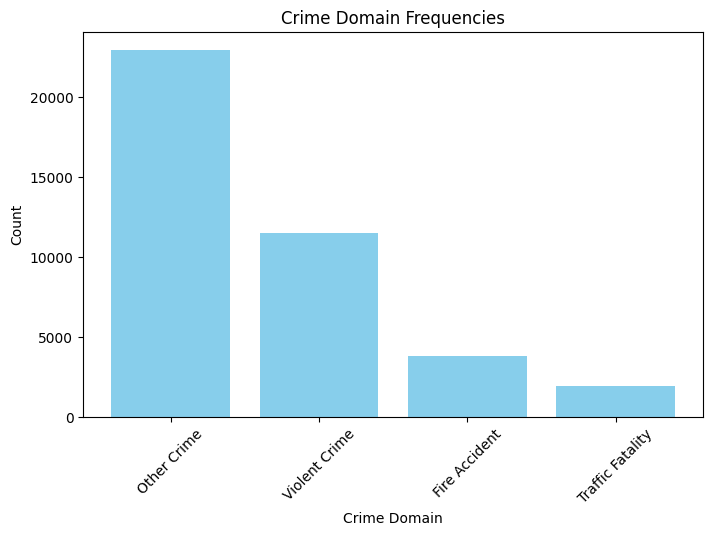

In [1301]:
domain_counts = df['Crime Domain'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(domain_counts.index, domain_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Crime Domain Frequencies')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.show()

In [1302]:
df['Case Closed'].unique()


array(['No', 'Yes'], dtype=object)

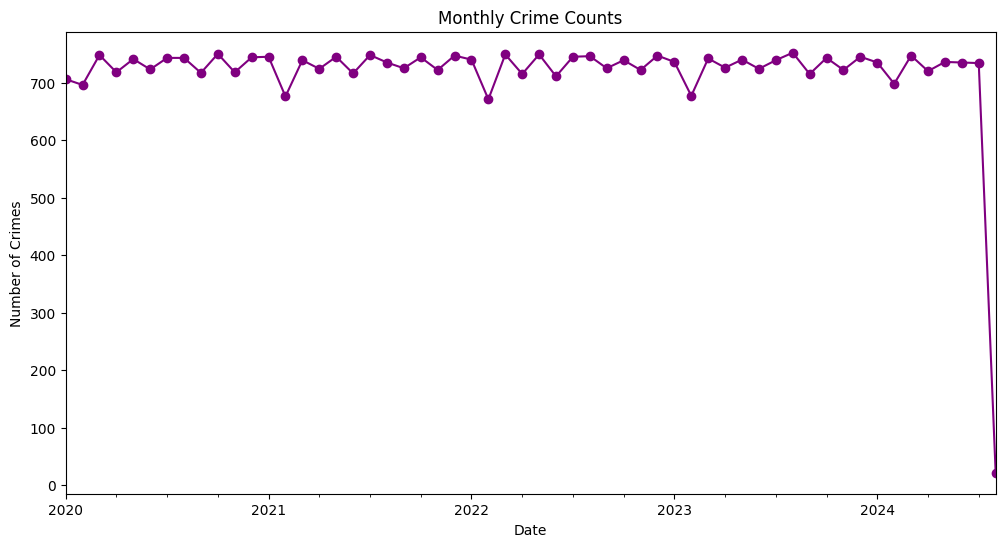

In [1303]:
df.loc[:, 'Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y')

monthly_counts = df.groupby(pd.Grouper(key='Date Reported', freq='ME')).size()

monthly_counts.plot(marker='o', figsize=(12,6), color='purple')
plt.title('Monthly Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()



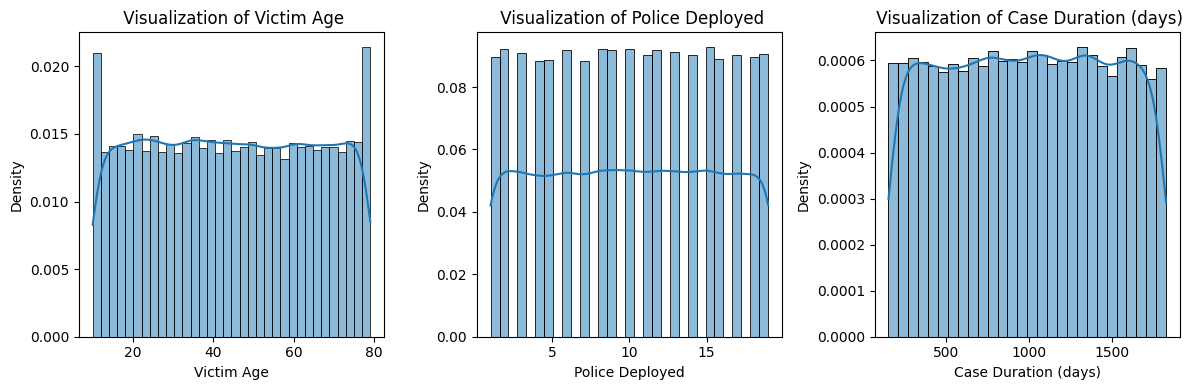

In [1305]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, stat="density")
    plt.title(f' Visualization of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

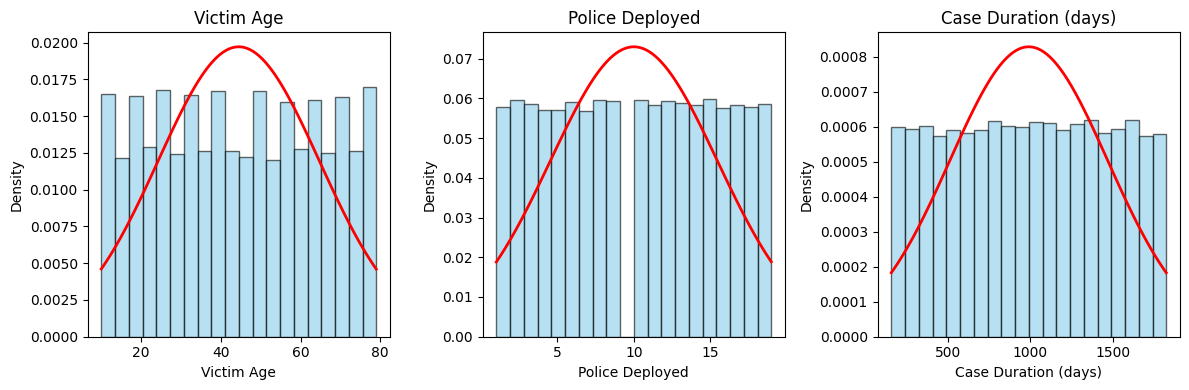

In [1306]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ['Victim Age', 'Police Deployed', 'Case Duration (days)']
plt.figure(figsize=(12, 4))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    mu, std = data.mean(), data.std()
    plt.subplot(1, 3, i+1)
    plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue',edgecolor='black')
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [1308]:
df.drop(columns=[ 'Date Case Closed'], inplace=True)

In [1309]:
df

,Date Reported,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date of Occurrence,Time Only,Age Group,Case Duration (days)
0,2020-01-02,Ahmedabad,IDENTITY THEFT,16,0,Blunt Object,Violent Crime,13,No,2020-01-01,01:11:00,Teen,1826.0
1,2020-01-01,Chennai,HOMICIDE,37,0,Poison,Other Crime,9,No,2020-01-01,06:26:00,Adult,1827.0
2,2020-01-02,Ludhiana,KIDNAPPING,48,1,Blunt Object,Other Crime,15,No,2020-01-01,14:30:00,Middle Age,1826.0
3,2020-01-01,Pune,BURGLARY,49,1,Firearm,Other Crime,1,Yes,2020-01-01,14:46:00,Middle Age,NaN
4,2020-01-01,Pune,VANDALISM,30,1,Other,Other Crime,18,Yes,2020-01-01,16:51:00,Young Adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,2024-08-01,Kolkata,COUNTERFEITING,78,1,Firearm,Other Crime,12,No,2024-07-31,05:05:00,Old age,153.0
40156,2024-07-31,Mumbai,ILLEGAL POSSESSION,75,1,Knife,Other Crime,2,Yes,2024-07-31,04:14:00,Old age,NaN
40157,2024-08-02,Kanpur,VEHICLE - STOLEN,68,0,Other,Violent Crime,6,No,2024-07-31,21:33:00,Old age,152.0
40158,2024-08-01,Patna,SEXUAL ASSAULT,11,0,Blunt Object,Violent Crime,1,No,2024-07-31,11:05:00,Child,153.0
